In [1]:
pip install yfinance

  Using cached yfinance-0.2.22-py2.py3-none-any.whl (63 kB)
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Using cached frozendict-2.3.8-cp38-cp38-win_amd64.whl (35 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached lxml-4.9.3-cp38-cp38-win_amd64.whl (3.9 MB)
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.3
    Uninstalling lxml-4.6.3:

      Successfully uninstalled lxml-4.6.3
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-4.9.3


In [3]:
import yfinance as yf
import pandas as pd

In [4]:
start_date = '2017-02-27'
end_date = '2022-02-25'

df_tesla = yf.download('TSLA', start=start_date, end=end_date)

print(df_tesla.head())  # Print the first few rows of the DataFrame

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-02-27  16.544666  16.557333  16.134001  16.415333  16.415333  171912000
2017-02-28  16.279333  16.733334  16.260000  16.666000  16.666000   91171500
2017-03-01  16.945333  16.990000  16.607332  16.667999  16.667999   72142500
2017-03-02  16.647333  16.885332  16.551332  16.698668  16.698668   50277000
2017-03-03  16.716000  16.793333  16.600000  16.771334  16.771334   43791000


In [6]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000
...,...,...,...,...,...,...
2022-02-17,304.420013,306.166656,291.366669,292.116669,292.116669,55178400
2022-02-18,295.333344,295.623322,279.203339,285.660004,285.660004,68501700
2022-02-22,278.043335,285.576660,267.033325,273.843323,273.843323,83288100


In [7]:
df_tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-17,304.420013,306.166656,291.366669,292.116669,292.116669,55178400
2022-02-18,295.333344,295.623322,279.203339,285.660004,285.660004,68501700
2022-02-22,278.043335,285.576660,267.033325,273.843323,273.843323,83288100
2022-02-23,276.809998,278.433319,253.520004,254.679993,254.679993,95256900
2022-02-24,233.463333,267.493347,233.333328,266.923340,266.923340,135322200


<AxesSubplot:xlabel='Date'>

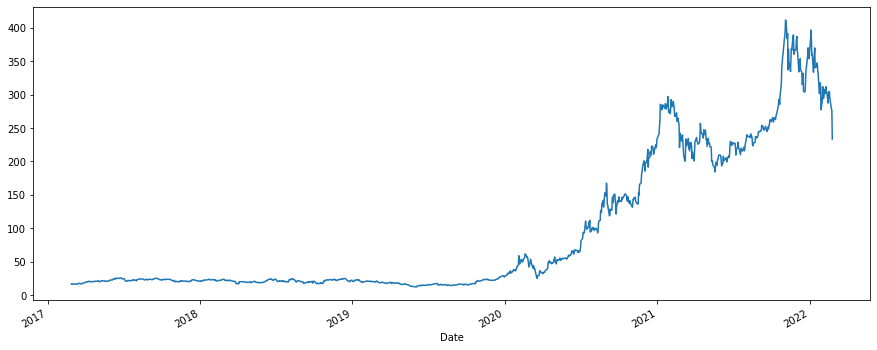

In [9]:
#Simple moving average - Used for smoothening of the graph
df_tesla['Open'].plot(figsize=(15,6))

In [22]:
df_tesla['Open:10 days rolling']=df_tesla['Open'].rolling(window=10, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

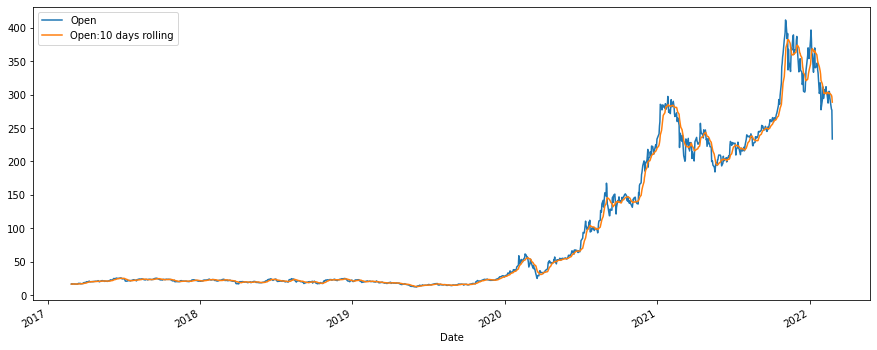

In [23]:
df_tesla[['Open','Open:10 days rolling']].plot(figsize=(15,6))

In [24]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(window=30, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

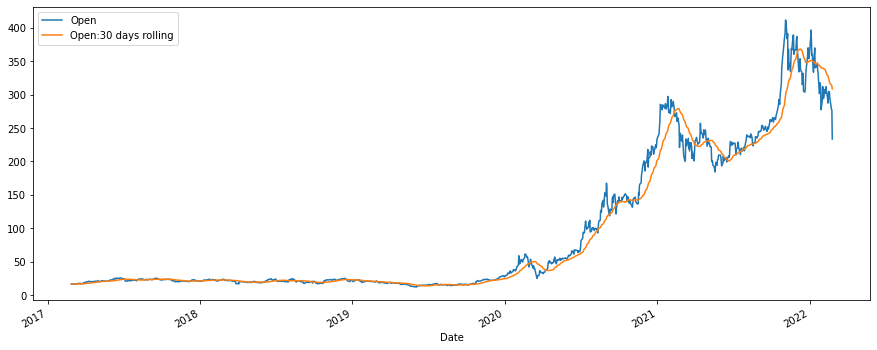

In [25]:
df_tesla[['Open','Open:30 days rolling']].plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

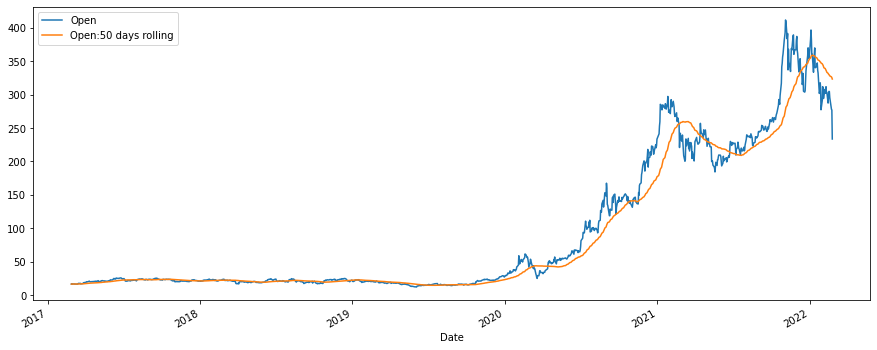

In [26]:
df_tesla['Open:50 days rolling']=df_tesla['Open'].rolling(window=50, min_periods=1).mean()
df_tesla[['Open','Open:50 days rolling']].plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

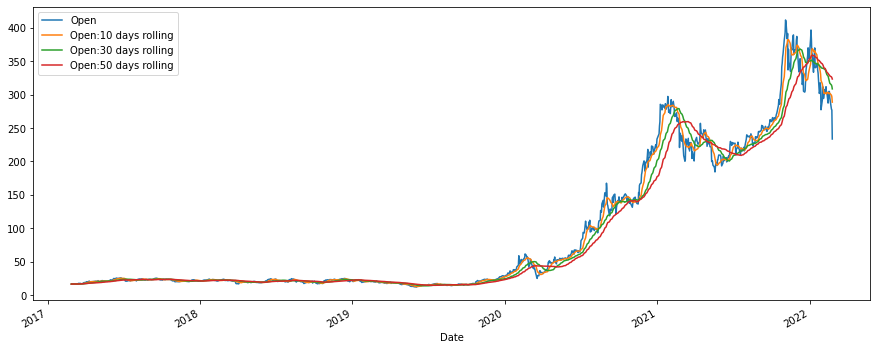

In [27]:
df_tesla[['Open','Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

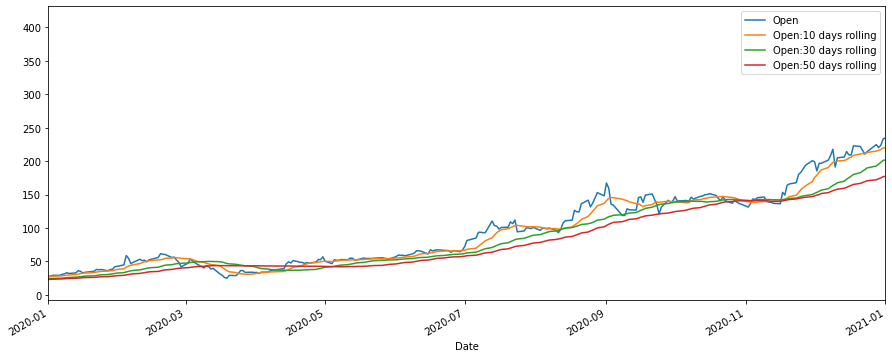

In [28]:
#Adding limits
df_tesla[['Open','Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [ ]:
#Expanding - Cumilative moving average

<AxesSubplot:xlabel='Date'>

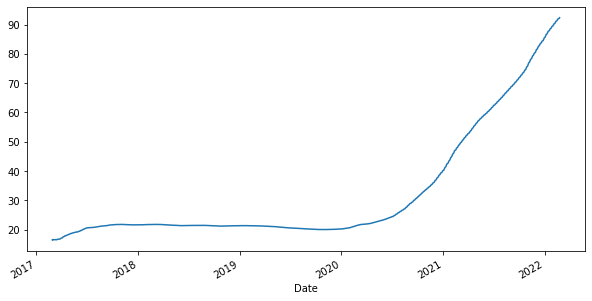

In [29]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

In [31]:
#EWMA-Exponential weighted moving average
#Smoothing factor - 0.1
df_tesla['EMA_0.1']=df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

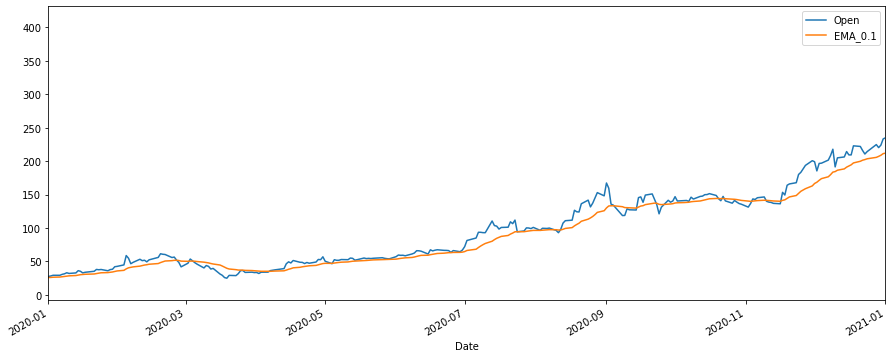

In [33]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [34]:
df_tesla['EMA_0.3']=df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

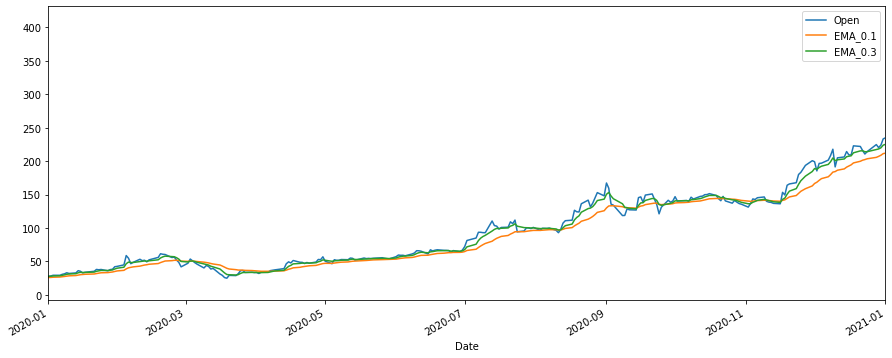

In [35]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))